# Programming Homework #3

학번 : 2017111299

이름 : 이혜원

---

붓꽃 데이터셋을 사용하여, 특성 스케일을 변경하고,Iris-Virginia 품종을 감지하기 위해 사이킷런의 선형
SVM 모델을 훈련시킵니다. 이 때, 하이퍼파라메터 C가 1, 50, 100일 때의 산점도 그래프를 각각 출력하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#데이터 불러오기
iris = datasets.load_iris()

X = iris["data"][:,(2,3)]                   # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64)  # Iris-Virsicolor면 1. , 아니면 0
                                            # 0: Setosa / 1: Virsicolor / 2: Virginica

In [2]:
def SVM_classification(c): # C는 도로 폭 크기
    # pipeline 생성
    svm_clf = Pipeline([
        ("scaler", StandardScaler()), #특성 스케일에 민감함으로 SVM보다 먼저 스케일링
        ("linear_svc", LinearSVC(C=c, loss="hinge", max_iter=50000)),
    ])
    
    #model fitting
    svm_clf.fit(X,y)
    
    #가중치 및 편향
    w = -svm_clf.named_steps["linear_svc"].coef_[0,0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
    b = -svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0,1]

    #결정 경계
    line = svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b], [5, 5*w+b]])
    plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")

    #기존 데이터
    plt.plot(X[:,0][y==1], X[:,1][y==1],'bo', label='Iris-Virginica', markersize=4)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'yo', label='Non-Virginica', markersize=4)
    
    #테스트 데이터
    if svm_clf.predict([[6, 1.2]]) == [1.]:
        star_name = 'Iris-Virginica'
        star_color = 'b*'
    else:
        star_name = 'Non-Virginica'
        star_color = 'y*'
    plt.plot(6, 1.2,'r*', markersize=15)
    plt.plot(6, 1.2, star_color, label=star_name, markersize=8.5)
    
    #그외 그래프 설정
    plt.xlabel("petal length", fontsize=14)
    plt.ylabel("petal width", fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=14)
    plt.title("Linear SVM fitting", fontsize=18)
    plt.axis([0, 7, 0, 2.5])
    plt.show()
    
    return line

### C=1

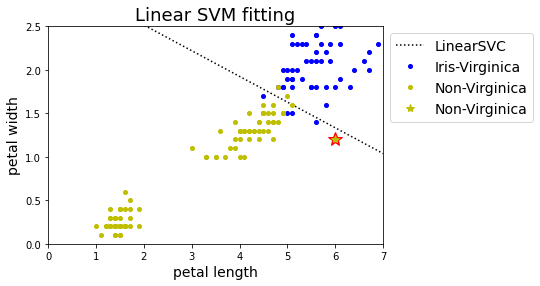

In [3]:
line1 = SVM_classification(1)

### C=50

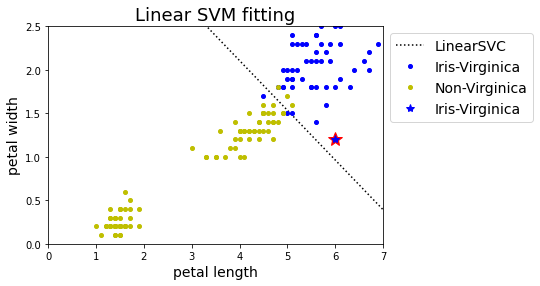

In [4]:
line2 = SVM_classification(50)

### C=100

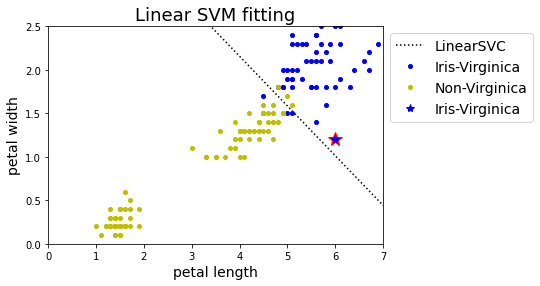

In [5]:
line3 = SVM_classification(100)

### 하나로 모아 보기

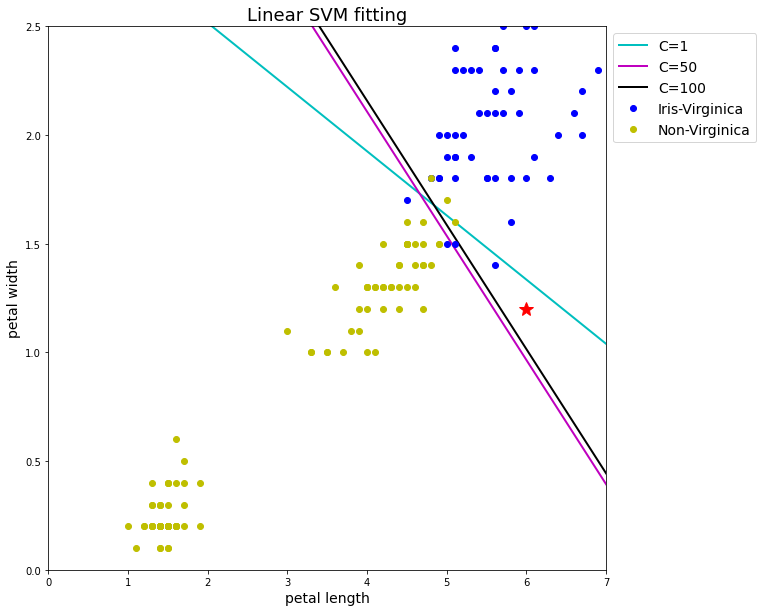

In [6]:
plt.figure(figsize=(10, 10))

# 결정 경계
plt.plot(line1[:,0], line1[:,1], "c-", linewidth=2, label="C=1")
plt.plot(line2[:,0], line2[:,1], "m-", linewidth=2, label="C=50")
plt.plot(line3[:,0], line3[:,1], "k-", linewidth=2, label="C=100")

#기존 데이터
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label='Iris-Virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Non-Virginica')

#테스트 데이터
plt.plot(6, 1.2,'r*', markersize=15)

#그 외 데이터 설정
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=14) #범례를 그래프 밖에 배치
plt.title("Linear SVM fitting", fontsize=18)
plt.axis([0, 7, 0, 2.5])
plt.show()

임의의 값을 적용한 테스트 데이터(빨간 별)가 C=1일 때는 Non-Virginica로 분류되고 C=50, C=100 일 때는 iris-Virginica로 분류되는 것을 볼 수 있습니다.